In [1]:
import pandas as pd
import numpy as np
import shark_attack_functions as f
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(15,8)})

In [2]:
shark_attack = pd.read_csv('attacks.csv', encoding='latin1')
shark_attack.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [3]:
shark_attack_copy = shark_attack.copy()  #guardamos copia del df

In [4]:
shark_attack.describe(include='object')

,Case Number,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,Unnamed: 22,Unnamed: 23
count,8702,6302,6298,6252,5847,5762,5758,6092,5737,3471,...,2948,3464,6285,6302,6301,6302,6302,6302,1,2
unique,6287,5433,8,212,825,4108,1532,5230,6,157,...,366,1549,4969,6291,6290,6285,6285,6286,1,2
top,0,1957,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,17,...,Afternoon,White shark,"C. Moore, GSAF",1923.00.00.a-NJ fisherman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1920.00.00.b,1920.00.00.b,stopped here,Teramo
freq,2400,11,4595,2229,1037,163,971,550,5094,154,...,187,163,105,2,2,4,2,2,1,1


## Modificación de columnas 

In [5]:
shark_attack.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
# Cambiamos a minusculas todas las columnas, y quitamos posible espacios antes y despues del texto
shark_attack.columns = list(map(lambda x: x.lower().lstrip().rstrip(),list(shark_attack.columns)))

# El motivo de este cambio es para facilitar su manipulación

In [7]:
# Quitamos columnas que no nos aportan información para el objetivo 
# Se quedan: Case Number, Date, Year, Type, Country, Area, Location, Activity, Sex, Age, Injury, Fatal 
# Se eliminan: Name, Time, Species, Investigator or Source, pdf, href, href formula, case number.1, case number.2, 
# original order, unnamed: 22, unnanamed:23

delete_columns = ['name', 'time', 'species','investigator or source', 'pdf', 'href formula', 'href','case number.1', 'case number.2', 'original order', 'unnamed: 22','unnamed: 23']
shark_attack.drop(delete_columns, axis = 1, inplace = True)

In [8]:
# Renombramos algunas columnas
shark_attack.rename(columns={'case number' : 'date',
                             'date' : 'date_2',
                             'fatal (y/n)' : 'fatal',
                            }, inplace = True)

## Eliminación de filas con 5 o más nulos

In [9]:
#Eliminamos las filas con 5 o más nulos
shark_attack.dropna(thresh = 5, inplace = True)

## Comprobación de líneas duplicadas

In [10]:
shark_attack.duplicated().sum()   #no hay registros completos duplicados

0

## Limpieza inicial de columnas 'date' y 'date_2'

In [11]:
# eliminamos registros de fechas muy antiguas fijandonos en las últimos valores de las columnas date y date_2 
shark_attack = f.delete_rows(shark_attack, 'date', 'ND')

In [12]:
delete_data_date2 = ['B.C', 'A.D', 'Ca']
shark_attack = f.delete_rows_col(shark_attack, 'date_2', delete_data_date2)

## Limpieza de columna 'year' 

In [13]:
#eliminamos las 2 filas con nulos en columna year ya que no hay información válida para reemplazar por año
shark_attack.dropna(subset = 'year', inplace = True)

In [14]:
# Cambiamos el tipo de variable de la columna year a int
shark_attack.year = shark_attack.year.apply(int)

In [15]:
# filtrado por año 2000
shark_attack = shark_attack[shark_attack.year >=2000]

## Formateo de datos de columnas con valores de string 

In [16]:
# cambiamos las columnas con valores de string a minúsculas y quitamos espacios delante y detras si los hay
shark_attack[['type','country','area','location','activity','injury']] = shark_attack[['type','country','area',
                'location','activity','injury']].applymap(lambda x: str(x).lower().lstrip().rstrip())

# El motivo de este cambio es para facilitar su manipulación

## Limpieza de la columna 'type' 

In [17]:
#Los 301 valores que no son 'provoked' asumiremos que son 'unprovoked'
shark_attack.type = ['unprovoked' if value != 'provoked' else value for value in shark_attack.type]
shark_attack.type.value_counts()

unprovoked    1918
provoked       160
Name: type, dtype: int64

## Limpieza de la columna 'activity' haciendo agrupaciones por tipo de actividad

In [18]:
# Reemplazamos algunos textos por palabras clave
# Ponemos shark a todo lo que tenga que ver con estar cerca de un tiburón para ayudarlo, alimentarlo, cazarlo...

data_clean_activity = ['fish','surf','filming','diving','swimming','wading',
                       'filming','snorkeling','paddling','boat','walking','shark','bathing',
                       'photo','washing','play','kayak','paddle','rowing','air disaster',
                       'sinking','hiking','boogie board','tsunami','research','sup'
                      ] 
shark_attack.activity = f.clean_col(shark_attack,'activity',data_clean_activity)

In [19]:
# Agrupamos actividades similares
list_fishing = ['fish',  'lobstering','standing, collecting sea stars','crabbing', 'shrimping', 
                'collecting beche-de-mer', 'attempting to catch a crocodile', 'casting a net'
               ]
list_board_water_sport = ['surf', 'boogie board', 'body boarding','sup', 'skimboarding', 'kite boarding',
                         'kiteboarding', 'bodyboarding', 'wakeboarding', 'body-boarding','kite-boarding',
                        ]
list_boats = ['paddling', 'paddle', 'boat', 'kayak', 'canoeing', 'kakaying', 'sailing', 'jet skiing', 
              'attempting to fix motor', 'yacht race', 'floating on a raft', 'rowing',
             ]
list_swimming = ['swimming', 'snorkeling', 'bathing','floating', 'floating in tube', 'standing in inner tube',
                'jumping in the waves','jumping', 'jumped into the water', 'batin']
list_diving = ['diving']
list_near_water = ['standing','walking', 'wading', 'washing','treading water', 'play', 'sitting in the water',
                   'kneeling in the water', 'fell into the water', 'crawling','floating face-down in knee-deep water',
                   "crouching in 2' of water", 'hiking'
                  ]
list_near_shark = ['shark']
list_disasters = ['sea disaster','rescuing', 'air disaster', 'sinking', 'murder', 'tsunami',
                  'canoe with 3 men onboard sank', 'shipwrecked', 'attempting to retreive a dinghy',
                  'the 426-ton cargo ship mia, laden with cement, capsized in heavy seas',
                  ]
list_recording = ['filming', 'photo']
list_others = ['feeding stingrays?', 'lifesaving drill', 'attempting to illegally enter the usa','research' ]
list_unknown = ('unknown', 'nan')

# lista de listas de actividades agrupadas
list_activity = list([list_fishing, list_board_water_sport, list_boats, list_swimming, list_diving, list_near_water, 
                  list_near_shark, list_disasters, list_recording, list_others, list_unknown])
# lista de nombres de agrupación de actividades
list_activity_group = ['fishing', 'board_water_sport', 'boats', 'swimming', 'diving','near_water','near_shark',
                       'disasters', 'recording','others', 'unknown']

# llamamos a una función para reemplazar los valores en función de los grupos de actividades
shark_attack.activity = f.col_groups(shark_attack, 'activity', list_activity, list_activity_group)
shark_attack.activity.value_counts()

board_water_sport    823
swimming             411
fishing              346
near_water           149
diving               114
unknown               93
boats                 73
near_shark            37
disasters             23
recording              5
others                 4
Name: activity, dtype: int64

## Limpieza de la columna 'sex'

In [20]:
# Como la mayoría es de valor M, cambiamos los 104 nulos a 'M' que el valor de la mayoría de los valores, mode()
shark_attack.sex.fillna(shark_attack.sex.mode()[0], inplace = True)

#Cambiamos los 3 valores diferentes a 'M' y 'F', a 'M', mode()
shark_attack.sex=[shark_attack.sex.mode()[0] if ((value != 'M') and (value != 'F')) else value for value in shark_attack.sex]

shark_attack.sex.value_counts()

M    1737
F     341
Name: sex, dtype: int64

## Limpieza de la columna 'age' . Se eliminan filas con edades inferiores a 17 años

In [21]:
# Eliminaremos edades inferiores a 17 años y para rellenar nulos, elegiremos entre la media y la mediana por sexo

In [22]:
# Pasamos a nulos los valores que no nos dan información
shark_attack.age.replace('\xa0 ',np.nan, inplace=True) # caracter raro, lo ponemos como nulo
shark_attack.age.replace(' ',np.nan, inplace=True) # espacio, lo ponemos como nulo

In [23]:
#Los valores en los que aparece month, teen y 1/2 las eliminamos ya que la edad es menor de 17 años.
delete_row_age = ['month', 'een','½']
shark_attack = f.delete_rows_col(shark_attack, 'age', delete_row_age)

# Tratamos los valores que indican más de una edad dejando la primera edad indicada.
data_clean_age_0 = ['s', '&', 'or', ',']
shark_attack.age = f.clean_age(shark_attack,'age',data_clean_age_0,0)
    
# Tratamos el valor 'mid-30s' dejando solo la edad indicada.
shark_attack.age = f.clean_age(shark_attack,'age','mid-',1)

In [24]:
# Buscamos la media y la mediana por sexo para elegir el valor para substituir los nulos.

# guardamos un dataframe solo con las filas que no tienen valores nulos en la columna age
shark_attack_age = shark_attack.dropna(subset = 'age')

(mean_M, mean_F, median_M, median_F) = f.mean_vs_median_age_sex (shark_attack_age, 'age')

Media: M 30 F 28
Mediana: M 28 F 22


<AxesSubplot:xlabel='age', ylabel='count'>

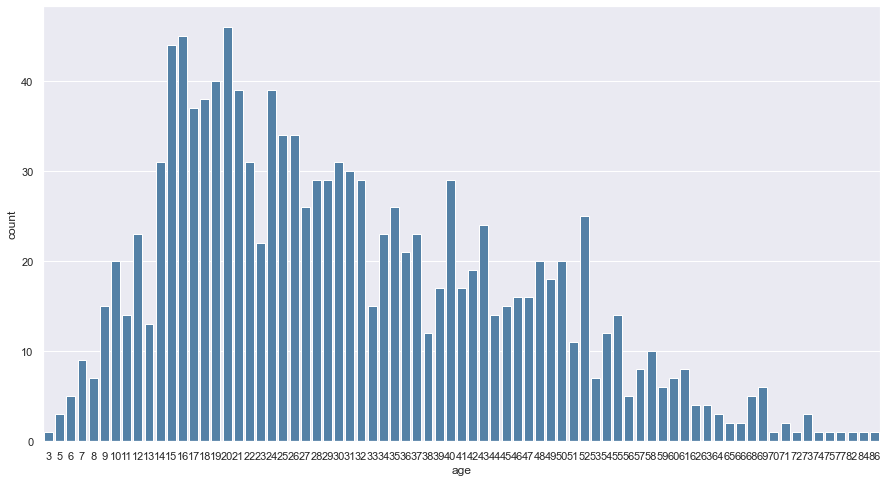

In [25]:
# Para ver que valor es mejor escoger para rellenar nulos por cada sexo
# extraemos dataframe solo con valores unicos y las veces que se repiten para ver gráfico 
# sex == M
shark_attack_age=shark_attack_age.copy()  # para evitar el warning SettingWithCopyWarning
shark_attack_age.age = shark_attack_age.age.apply(int)
M_age =shark_attack_age[shark_attack_age.sex=='M'].sort_values('age')

sns.countplot(x=M_age.age, color = 'steelblue')


<AxesSubplot:xlabel='age', ylabel='count'>

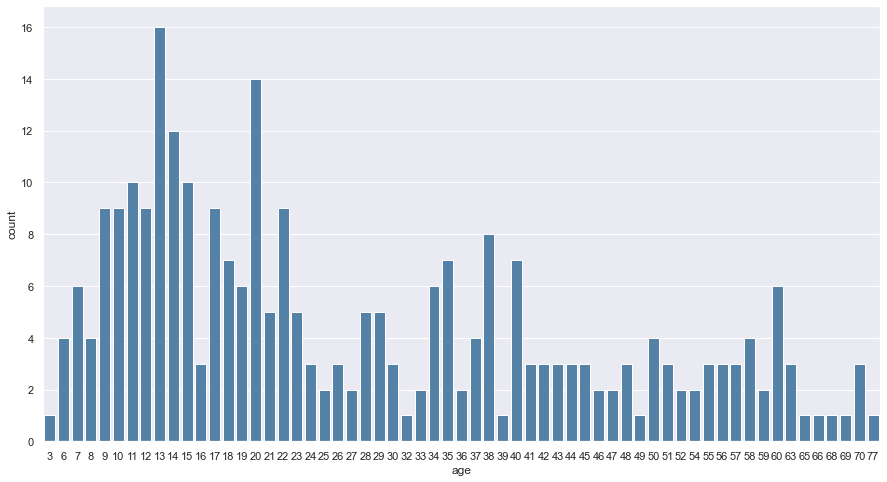

In [26]:
# sex == F
F_age =shark_attack_age[shark_attack_age.sex=='F'].sort_values('age')
sns.countplot(x=F_age.age, color = 'steelblue')

In [27]:
#Sustituimos los nulos de la columna de edad donde el sexo es 'M' por 28 (mediana de edad de sexo 'M'), y donde el
#sexo es 'F' por 22 (mediana de edad de sexo 'F')

shark_attack = f.fill_null_col(shark_attack, 'age', 'sex', 'M', median_M, median_F)

In [28]:
# Cambiamos el tipo de variable de la columna age a int
shark_attack.age = shark_attack.age.apply(int)

In [29]:
# Eliminamos filas en que la edad es inferior a 17 años
shark_attack = shark_attack[shark_attack.age >17]

## Limpieza de la columna 'fatal' 

In [30]:
# Los valores que no son 'Y' o 'N', los cambiamos a 'N' ya que es la mayoría, mode()
# Para asignar valor a los nulos, estudiaremos lo que pone en la columna injury   

In [31]:
# Cambiamos todo lo que no es 'N' ni 'Y' ni nulo  a 'N'
data_clean_fatal = ['UNKNOWN', 'M', '2017']
shark_attack.fatal = f.replace_data(shark_attack,'fatal',data_clean_fatal,'N')

In [32]:
# Leemos la columna de 'injury' de las filas donde fatal tiene valor nulo. 
# Se observa que en algunas se indica la palabra 'fatal' y el resto no. 
# Consideramos que lo más fiable es cambiar los nulos por Y cuando en la columna 'injury' salga la palabra 'fatal,
# y N en el resto

shark_attack =  f.fill_null_col(shark_attack, 'fatal', 'injury', 'fatal', 'Y', 'N')
shark_attack.fatal.value_counts()

N    1529
Y     166
Name: fatal, dtype: int64

## Limpieza de la columna 'injury' 

In [33]:
# Reemplazamos algunos textos por palabras clave

# shark attack/shark involvement: explican que depués se demuestra que no lo fue, lo guardamos como shark attack pero 
#lo cambiaremos por false shark attack

# death: sale cuando dicen que no esta confirmada, lo cambiaremos por death not confirmed

# inch : cortes, heridas etc de x pulgadas

# no :  no personal injury, only boat/surboard...

# lacera:  para lacerations, lacerated, etc...

data_clean_injury = ['disappeared', 'fatal', 'no ','lacera','injury','injuries', 'puncture', 'injured', 'cut',
                     'killed','nip', 'shark attack', 'inch', 'amputated', 'drowning', 'not injure','missing',
                     'provoked incident', 'remains', 'severed', 'abrasion','gash', 'bruise','wound', 'avulsion', 
                     'death', 'scavenged', 'scratch','shark involvement', 'uninjured', 'bit','survived', 'inuries'
                      ]

#for s in data_clean_activity:
shark_attack.injury = f.clean_col(shark_attack,'injury',data_clean_injury)

In [34]:
#Agrupamos valores de 'injury' similares

list_human_major_injuries = ['lacera','injury', 'injuries', 'puncture', 'injured', 'cut','nip', 'inch','severed',
                             'gash','wound','bit', 'inuries']

list_human_severed_injuries = ['amputated', 'severed', 'avulsion', '"serious"' ]

list_human_minor_injuries = ['bruise', 'abrasion', 'wound', 'scratch', 'minor']

list_death_not_confirmed = ['death']

list_disappeared = ['disapperared', 'missing', 'nan']
               
list_no_personal_injury = ['no ','shark attack', 'not injure', 'shark involvement', 'uninured','survived']

list_fatal = ['killed','drowning', 'provoked incident','remains', 'scavenged']     


# lista de listas de 'injury' agrupadas
list_injury = list([list_human_major_injuries, list_human_severed_injuries, list_human_minor_injuries, 
                    list_death_not_confirmed, list_disappeared, list_no_personal_injury, list_fatal])

# lista de nombres de agrupación de 'injury'
list_injury_group = ['human_major_injuries', 'human_severed_injuries', 'human_minor_injuries','death_not_confirmed',
                     'disappeared','no_personal_injury', 'fatal']

# llamamos a una función para reemplazar los valores en función de los grupos de actividades
shark_attack.injury = f.col_groups(shark_attack, 'injury', list_injury, list_injury_group)

# Después de aplicar lo anterior nos devuelve 15 valores inatribuibles, por lo tanto decidimos crear
# la agrupacion 'other injuries'

# Llamamos a una función para reemplazar los valores que no están en las agrupaciones hechas por 'other injuries'
shark_attack.injury = f.other_injuries(shark_attack, 'injury', list_injury_group, 'other injuries')


In [35]:
shark_attack.injury.value_counts()

human_major_injuries      1067
no_personal_injury         340
fatal                      232
human_minor_injuries        17
other injuries              16
human_severed_injuries       8
disappeared                  8
death_not_confirmed          7
Name: injury, dtype: int64

## Limpieza de fechas (columna date_2)

In [36]:
# Después de estudiar los valores de la columna 'date' y 'date_2', se decide eliminar 'date' y dejar 'date_2' ya que
# la información es más fiable.

# Se elimina la columna date
shark_attack.drop('date', axis = 1, inplace = True)

# Renombramos la columna 'date_2' por 'date'
shark_attack.rename(columns={'date_2' : 'date'}, inplace = True) 

# Como eliminamos date, a date_2 lo llamamos date

In [37]:
# Formateamos 91 filas que tienen delante de la fecha 'Reported', 1 con el texto '.b' y una con un '-' al final

shark_attack.date = shark_attack.date.str.strip('Reported ')
shark_attack.date = shark_attack.date.str.rstrip('.b')
shark_attack['date'] = shark_attack.date.str.rstrip('-')

In [38]:
# Limpiamos 1 fila que contiene el texto ' Reported to have happened  "on the weekend"'
shark_attack['date'] = shark_attack['date'].str.strip(' Reported to have happened  "on the weekend"')

In [39]:
# Se reemplazan varios valores de la columna 'date' con datos incorrectos

lista_cambios_especiales = ['16-Aug--2011','11-Aug--2011','190Feb-2010','2017.06.05','2008.01.30','20-May2015',
                           '13-May2014', '29-Nov2013', '07-July-2012', '12-Jan 2011', 'December 2012',
                            'November 2011', 'July 2006']


lista_nuevos_valores = ['16-Aug-2011','11-Aug-2011','19-Feb-2010','05-Jun-2017','30-Jan-2008','20-May-2015',
                       '13-May-2014', '29-Nov-2013','07-Jul-2012','12-Jan-2011', '01-Dec-2012', 
                       '01-Nov-2011', '01-Jul-2006']

shark_attack.date = f.replace_data_list(shark_attack,'date',lista_cambios_especiales,lista_nuevos_valores)

In [40]:
# Detectamos varios valores en la columna 'date' que solo indica mes y año: 
# 'Sep-2017', 'Sep-2016', 'Sep-2015','Aug-2014','Apr-2013', 'Jun-2010', 'Jan-2009','Dec-2008', 'Sep-2008', 'Jul-2007',
# 'May-2007', 'Feb-2007', 'Oct-2006','Aug-2006', 'Nov-2004', 'Aug-2004', 'Nov-2003', 'Sep-2003', 'Jul-2003',
# 'Jul-2003', 'Jun-2003', 'May-2003','Nov-2002', 'Jul-2001', 'Mar-2001', 'Dec-2000', 'Aug-2000', 'Mar-2000','May-2018'
# Se modifican añadiento '01-' delante

shark_attack.date = ['01-'+value if len(value) == 8 else value for value in shark_attack.date]

In [41]:
# Detectamos varios valores en la columna 'date' en la que el días es solo de 1 dígito: 
#'9-Mar-2018', '3-Jul-2014', '5-Jul-2014', '1-Aug-2005', '1-Jul-2005','1-Aug-2005', '1-Jul-2005'
# Se modifican añadiento '0' delante
shark_attack.date = ['0'+value if len(value) == 10 else value for value in shark_attack.date]

In [42]:
# Se eliminan filas donde el valor de 'date' no nos aporta una fecha fiable
lista_clean_date = ['2000','2014', '2004','Fall 2008','Summer-2008', 'Early Aug-2006', 'Late Jul-2003', 
                    'Early Sep-2000', 'Early Jun-2000']
shark_attack = f.delete_rows_col (shark_attack, 'date', lista_clean_date)

In [43]:
# Cambiamos los valores de la columna 'date' a datetime
shark_attack.date = pd.to_datetime(shark_attack.date)
shark_attack.date.dtypes

# Como podemos ver la columna date devuelve formato fecha

dtype('<M8[ns]')

In [44]:
shark_attack = shark_attack.reset_index()
shark_attack.drop('index', axis = 1, inplace = True)
shark_attack

,date,year,type,country,area,location,activity,sex,age,injury,fatal
0,2018-06-25,2018,unprovoked,usa,california,"oceanside, san diego county",boats,F,57,no_personal_injury,N
1,2018-06-09,2018,unprovoked,usa,hawaii,"habush, oahu",board_water_sport,M,48,human_major_injuries,N
2,2018-06-08,2018,unprovoked,australia,new south wales,arrawarra headland,board_water_sport,M,28,human_major_injuries,N
3,2018-06-04,2018,provoked,mexico,colima,la ticla,diving,M,28,human_major_injuries,N
4,2018-06-03,2018,unprovoked,australia,new south wales,"flat rock, ballina",board_water_sport,M,28,no_personal_injury,N
...,...,...,...,...,...,...,...,...,...,...,...
1430,2001-01-24,2001,unprovoked,australia,new south wales,south west rocks,boats,M,35,no_personal_injury,N
1431,2001-01-24,2001,unprovoked,cuba,holquin province,off blau costa verde resort,swimming,F,55,human_major_injuries,N
1432,2001-01-21,2001,unprovoked,australia,south australia,adelaide,fishing,M,28,no_personal_injury,N
1433,2001-01-09,2001,unprovoked,usa,california,"sunset cliffs, san diego",board_water_sport,M,28,human_minor_injuries,N


## Filtro por USA, el país con más ataques a tiburones. Se añade columna para agrupar las areas en costas y islas. 

In [45]:
# Definimos un dataframe separado solo con el país USA
shark_attack_usa = shark_attack[shark_attack.country == 'usa'] 

In [46]:
# Añadimos una columna después de áreas para poner estos valores. De  momento dejamos los mismos valores que 'area'
shark_attack_usa.insert(5,'coast_or_islands', shark_attack_usa.area, True)
shark_attack_usa.head(3)

,date,year,type,country,area,coast_or_islands,location,activity,sex,age,injury,fatal
0,2018-06-25,2018,unprovoked,usa,california,california,"oceanside, san diego county",boats,F,57,no_personal_injury,N
1,2018-06-09,2018,unprovoked,usa,hawaii,hawaii,"habush, oahu",board_water_sport,M,48,human_major_injuries,N
6,2018-05-27,2018,unprovoked,usa,florida,florida,"lighhouse point park, ponce inlet, volusia county",fishing,M,52,human_major_injuries,N


In [47]:
# Agrupamos las áreas de la columna 'area' en costas e islas
l_east_coast_usa = ['florida', 'south carolina', 'north carolina', 'texas', 'alabama','massachusetts','new york',
                  'new jersey', 'louisiana', 'virginia','maryland', 'maine', 'washington', 'delaware', 'kentucky',
                  'georgia'
                 ]
l_west_coast_usa = ['california','oregon', 'new mexico','alaska']
l_caribbean_islands = ['puerto rico', 'us virgin islands']
l_hawaii_pacific_islands = ['hawaii', 'palmyra atoll', 'guam', 'johnston atoll']

list_area =  [l_east_coast_usa, l_west_coast_usa, l_caribbean_islands, l_hawaii_pacific_islands] 

list_area_group = ['east_coast_usa', 'west_coast_usa', 'caribbean_islands', 'hawaii_pacific_islands']

shark_attack_usa = shark_attack_usa.copy()  # para evitar el warning SettingWithCopyWarning
shark_attack_usa.coast_or_islands = f.col_groups (shark_attack_usa, 'coast_or_islands', list_area, list_area_group)


In [48]:
shark_attack_usa.coast_or_islands.value_counts()

east_coast_usa            418
west_coast_usa            106
hawaii_pacific_islands    106
caribbean_islands           4
Name: coast_or_islands, dtype: int64

# Gráficos

## Ataques por año

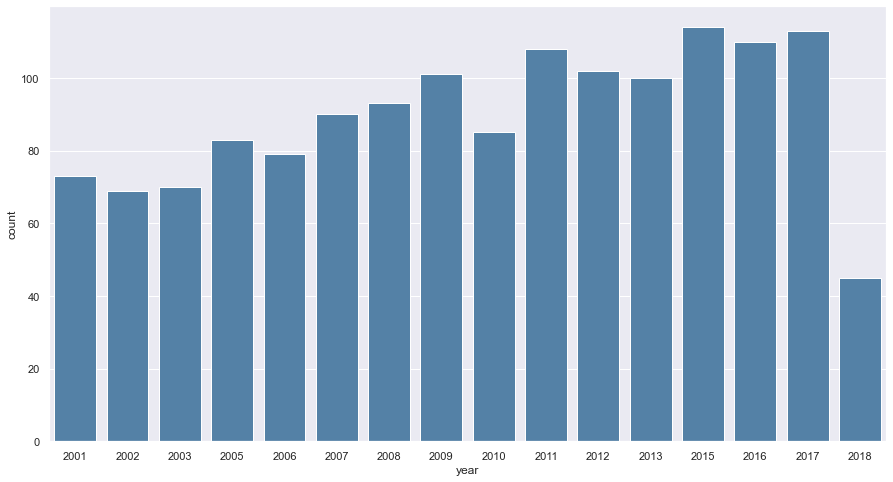

In [49]:
sns.countplot(x=shark_attack.year, color=('steelblue'));

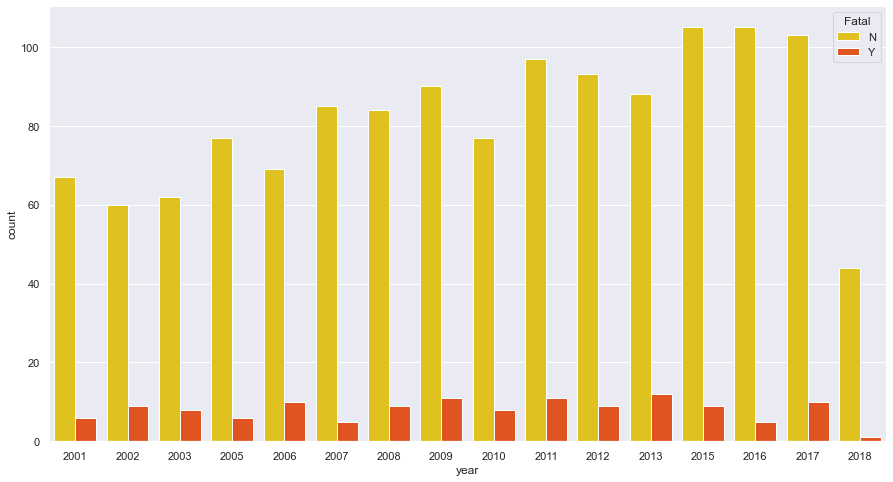

In [50]:
sns.countplot(x=shark_attack.year, hue=shark_attack.fatal, palette=('gold','orangered'))
plt.legend(loc = 'upper right', title = 'Fatal');

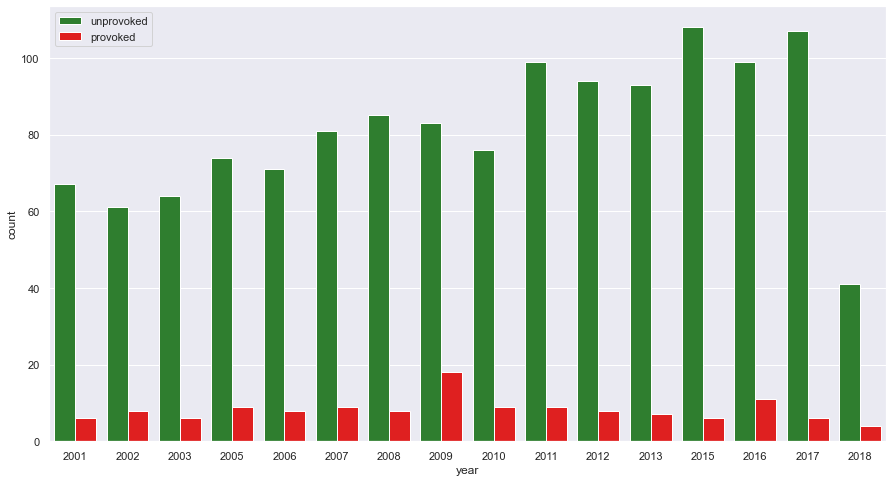

In [51]:
sns.countplot(x=shark_attack.year, hue=shark_attack.type, palette=('forestgreen','red'))
plt.legend(loc = 'upper left');

## Ataques por tipo (provocado / no provocado)

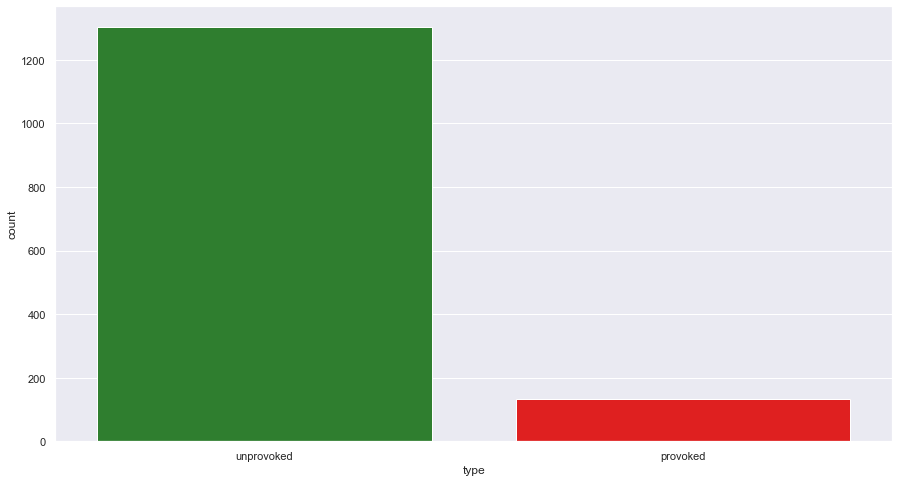

In [52]:
sns.countplot(x=shark_attack.type, palette=('forestgreen','red'));

## Ataques por sexo

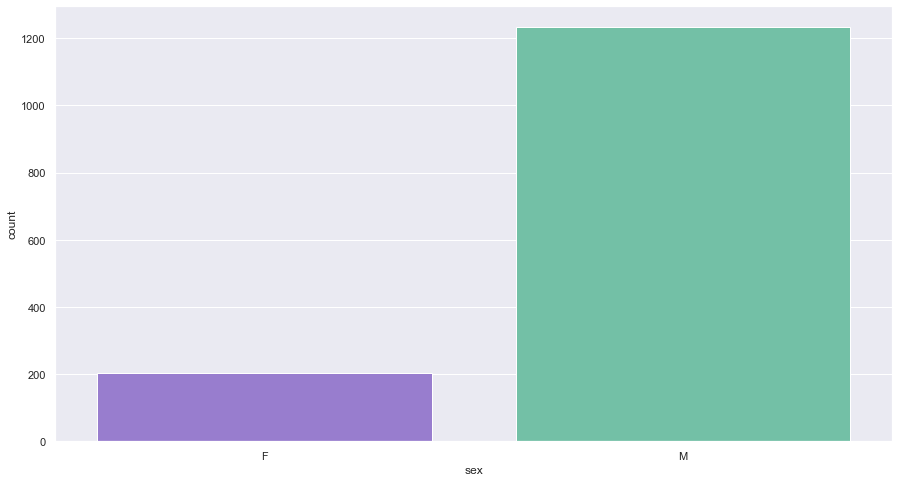

In [53]:
sns.countplot(x=shark_attack.sex, palette=('mediumpurple','mediumaquamarine'));

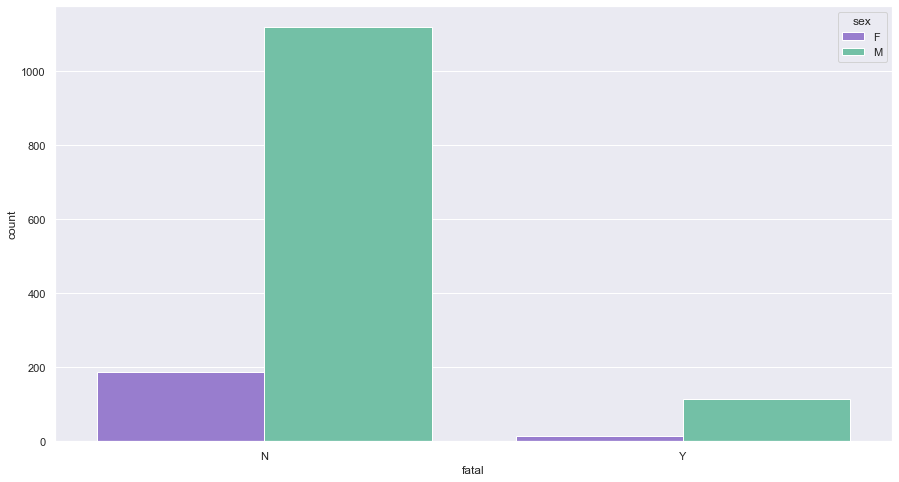

In [54]:
sns.countplot (x=shark_attack.fatal, hue=shark_attack.sex,palette=('mediumpurple','mediumaquamarine'));

<AxesSubplot:xlabel='type', ylabel='count'>

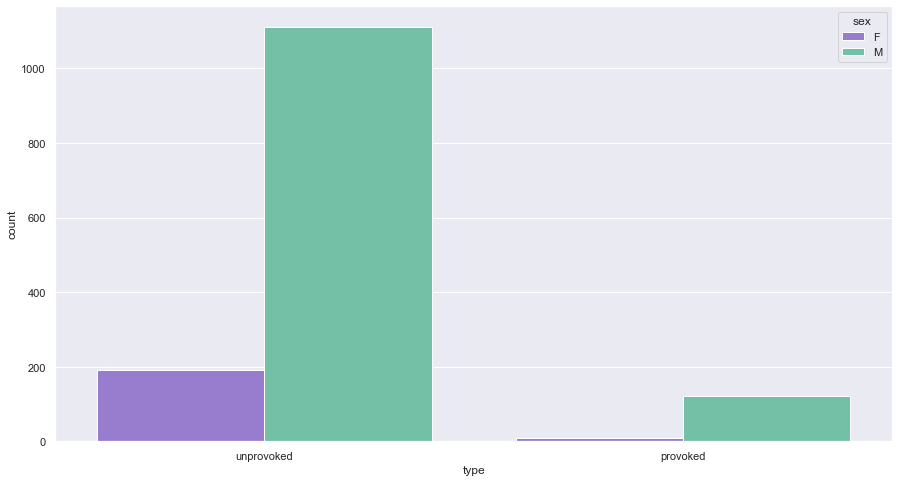

In [55]:
sns.countplot (x=shark_attack.type, hue=shark_attack.sex,palette=('mediumpurple','mediumaquamarine'))

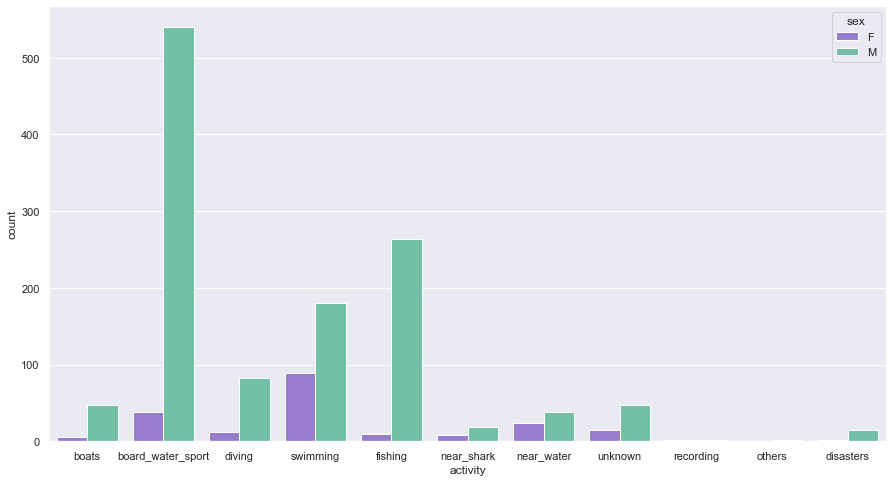

In [56]:
sns.countplot (x=shark_attack.activity, hue=shark_attack.sex,palette=('mediumpurple','mediumaquamarine'));

<AxesSubplot:xlabel='injury', ylabel='count'>

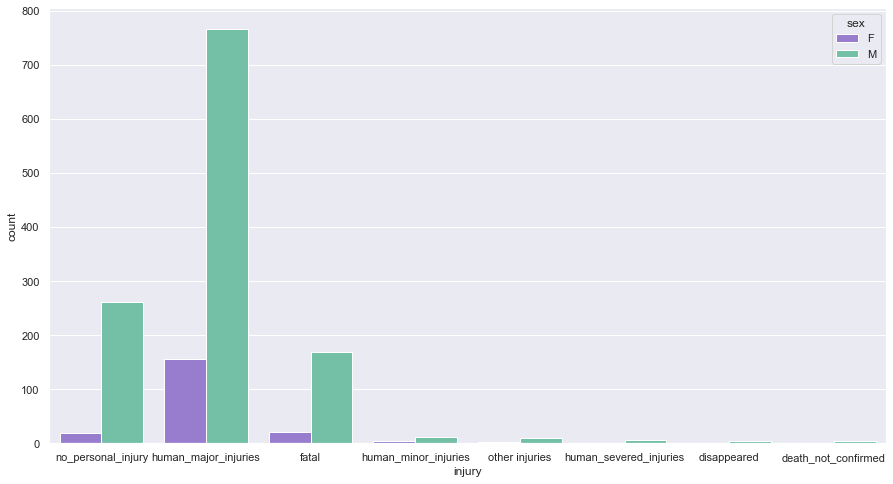

In [57]:
sns.countplot (x=shark_attack.injury, hue=shark_attack.sex,palette=('mediumpurple','mediumaquamarine'))

# Ataques por países (con 10 o más ataques)

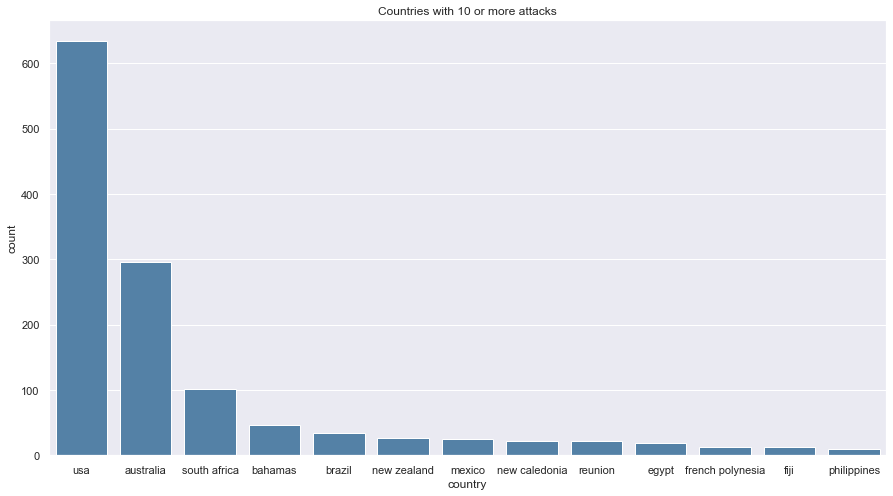

In [58]:
# Creamos dataframe solo los países con 10 o más ataques
top_country = shark_attack.country.value_counts().head(13).keys()
shark_attack_country = shark_attack[shark_attack.country.isin(top_country)] 
plt.title ('Countries with 10 or more attacks')
sns.countplot(x=shark_attack_country.country, order = shark_attack_country.country.value_counts().index,color = 'steelblue');

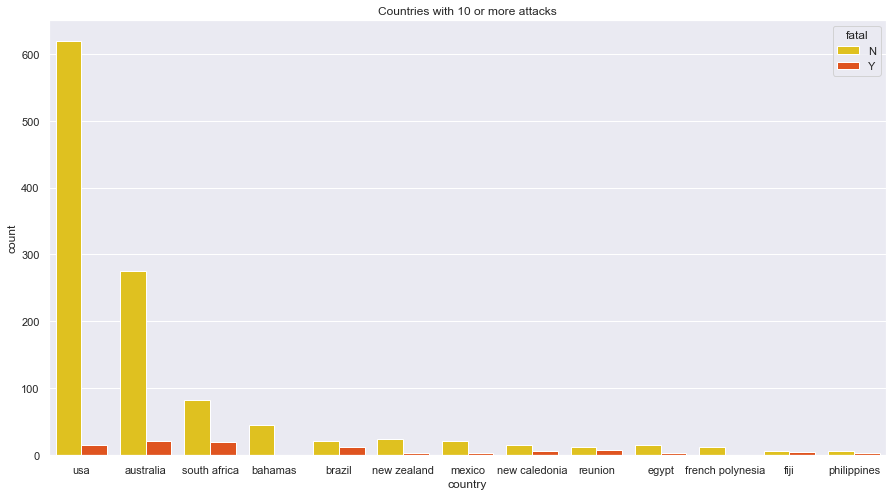

In [59]:
sns.countplot(x=shark_attack_country.country, hue= shark_attack_country.fatal, order = shark_attack_country.country.value_counts().index, palette=('gold','orangered'));
plt.title ('Countries with 10 or more attacks');

# Actividades por países (top 6)

In [60]:
# Creamos dataframe solo con los 6 paises con mas ataques
top6_country = shark_attack.country.value_counts().head(6).keys()
shark_attack_country_top6 = shark_attack[shark_attack.country.isin(top6_country)]

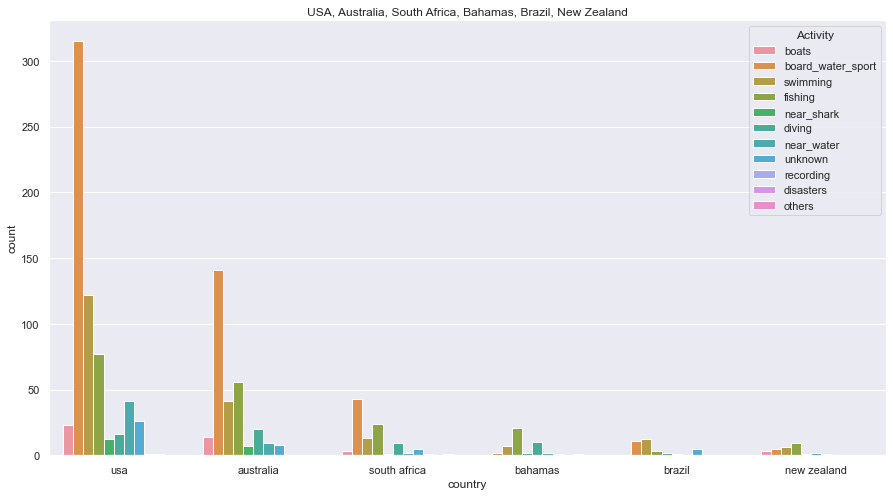

In [61]:
sns.countplot(x=shark_attack_country_top6.country, hue= shark_attack_country_top6.activity, order = shark_attack_country_top6.country.value_counts().index)
plt.title ('USA, Australia, South Africa, Bahamas, Brazil, New Zealand')
plt.legend(loc = 'upper right',title = 'Activity');

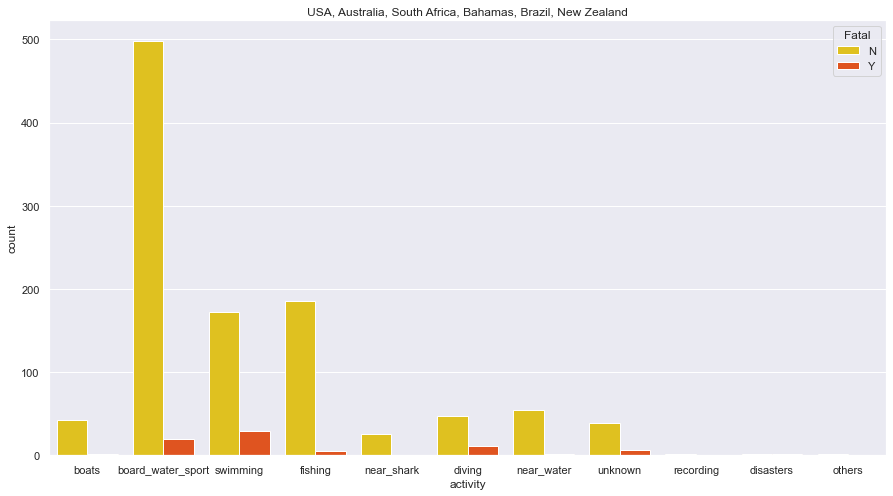

In [62]:
sns.countplot(x=shark_attack_country_top6.activity, hue= shark_attack_country_top6.fatal, palette = ('gold', 'orangered'))
plt.title ('USA, Australia, South Africa, Bahamas, Brazil, New Zealand')
plt.legend(loc = 'upper right',title = 'Fatal');

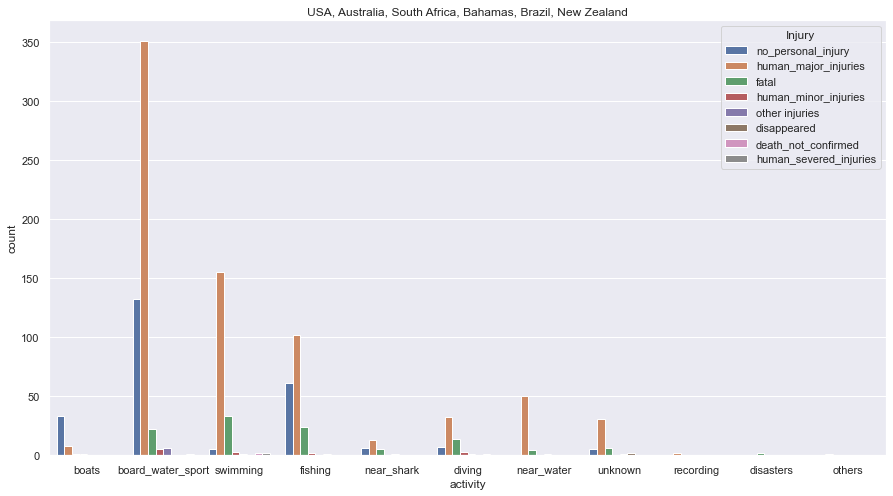

In [63]:
sns.countplot(x=shark_attack_country_top6.activity, hue= shark_attack_country_top6.injury)
plt.title ('USA, Australia, South Africa, Bahamas, Brazil, New Zealand')
plt.legend(loc = 'upper right', title = 'Injury');

## USA

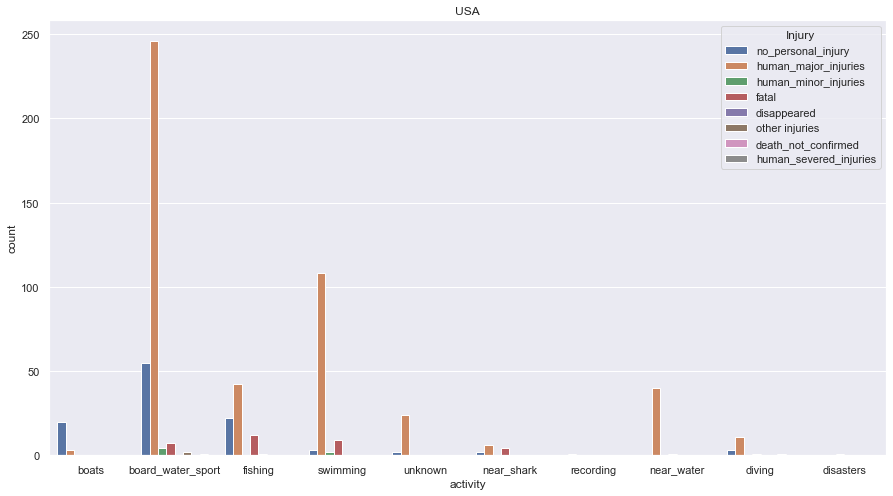

In [64]:

#shark_attack_usa = shark_attack_country_top6[shark_attack_country_top6.country == 'usa']
sns.countplot(x=shark_attack_usa.activity, hue=shark_attack_usa.injury)
plt.title ('USA')
plt.legend(loc ='upper right', title = 'Injury');

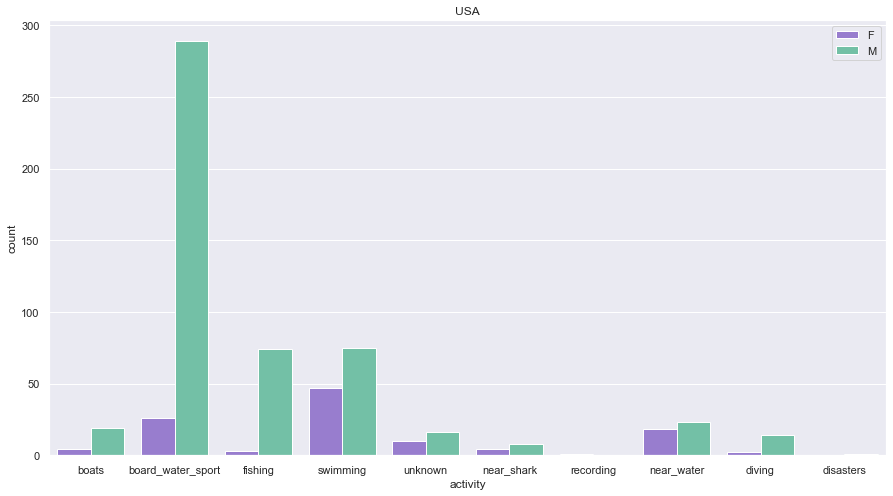

In [65]:
sns.countplot(x=shark_attack_usa.activity, hue=shark_attack_usa.sex, palette=('mediumpurple','mediumaquamarine'))
plt.title ('USA')
plt.legend(loc ='upper right');

#### Por áreas de USA 

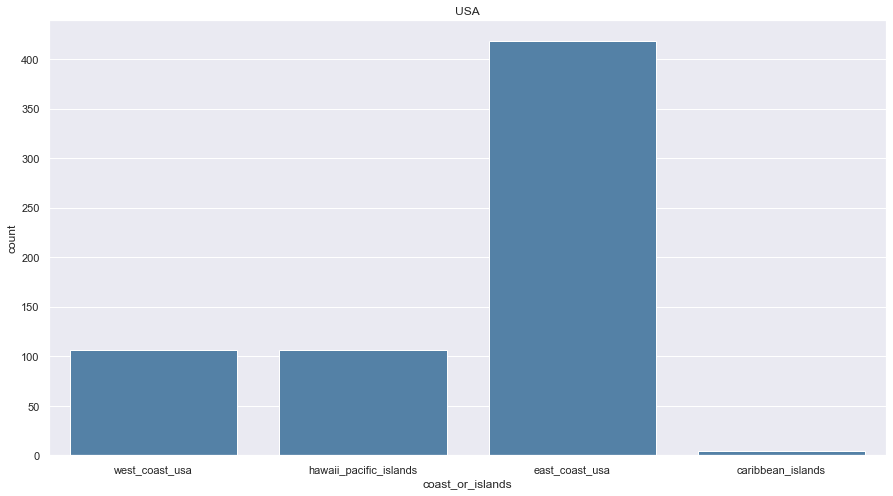

In [66]:
sns.countplot(x=shark_attack_usa.coast_or_islands, color = 'steelblue')
plt.title ('USA');

# Esta agrupacion se realiza no en la fase de data wrangling sino en la fase posterior de investigación

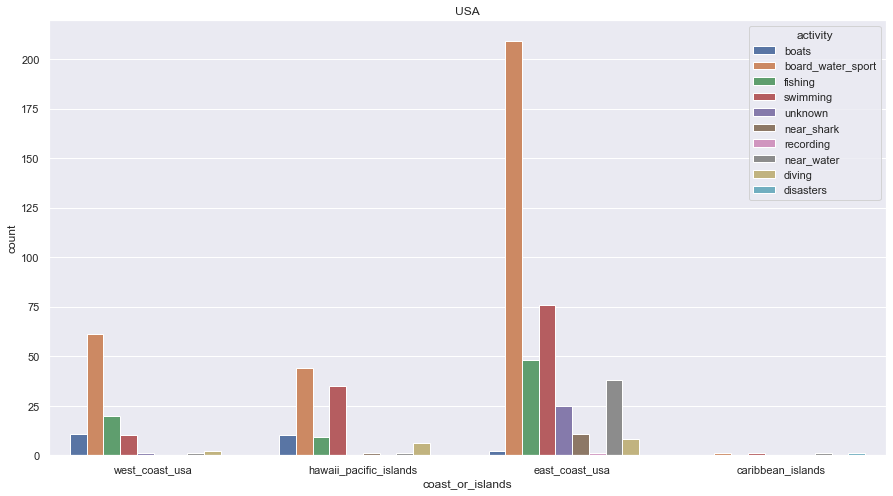

In [67]:
sns.countplot(x=shark_attack_usa.coast_or_islands, hue = shark_attack_usa.activity)
plt.title ('USA')
plt.legend(loc = 'upper right', title = 'activity');

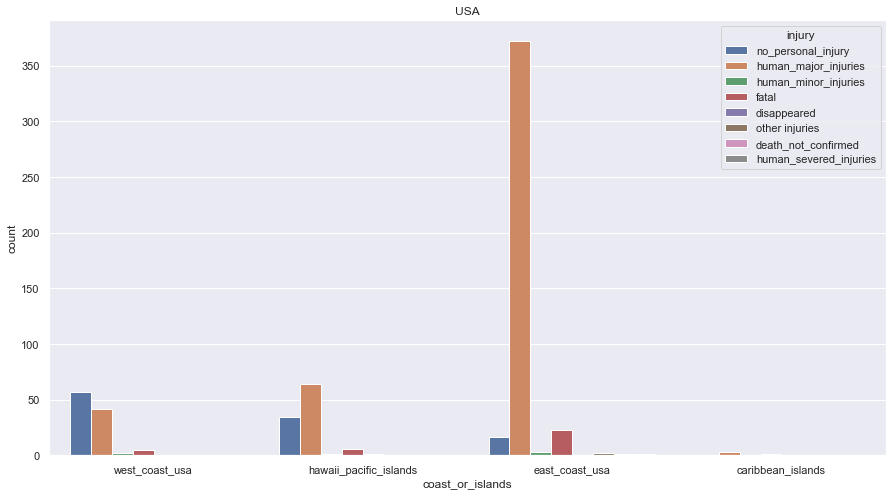

In [68]:
sns.countplot(x=shark_attack_usa.coast_or_islands, hue = shark_attack_usa.injury)
plt.title ('USA')
plt.legend(loc = 'upper right', title = 'injury');

# Ataques por meses (Países top 6)

In [69]:
shark_attack_top6_month = shark_attack_country_top6.copy()
shark_attack_top6_month.date = shark_attack_top6_month.date.dt.month

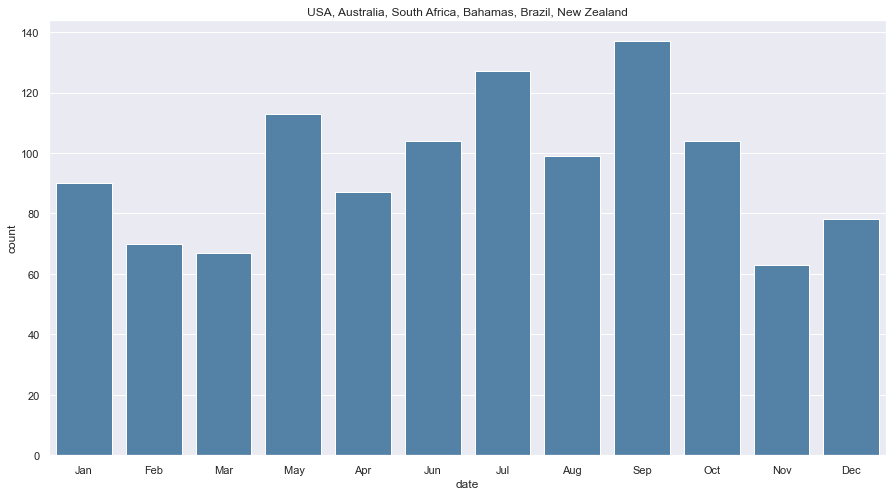

In [70]:
graf = sns.countplot(x=shark_attack_top6_month.date, color= 'steelblue');
plt.title ('USA, Australia, South Africa, Bahamas, Brazil, New Zealand')
labels = ('Jan', 'Feb', 'Mar', ' May', 'Apr', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
graf.set_xticklabels(labels);

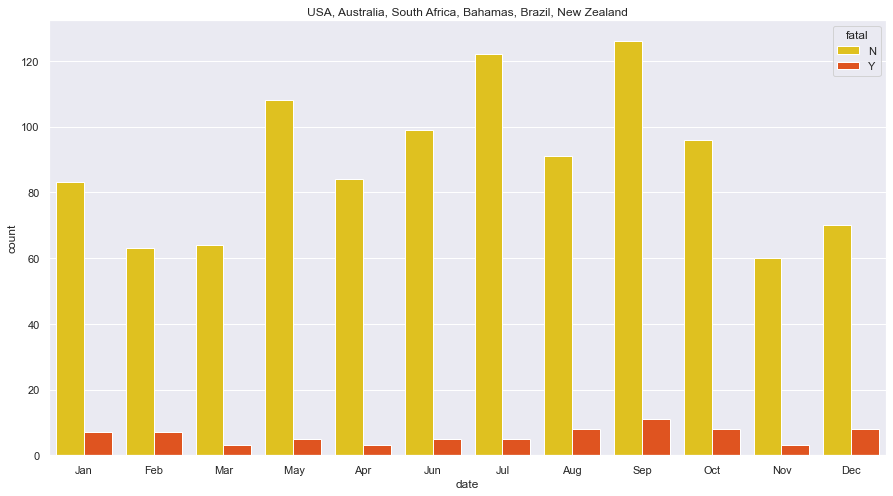

In [71]:
graf = sns.countplot(x=shark_attack_top6_month.date, hue=shark_attack_top6_month.fatal, palette =('gold', 'orangered'))
plt.title ('USA, Australia, South Africa, Bahamas, Brazil, New Zealand')
labels = ('Jan', 'Feb', 'Mar', ' May', 'Apr', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
graf.set_xticklabels(labels);

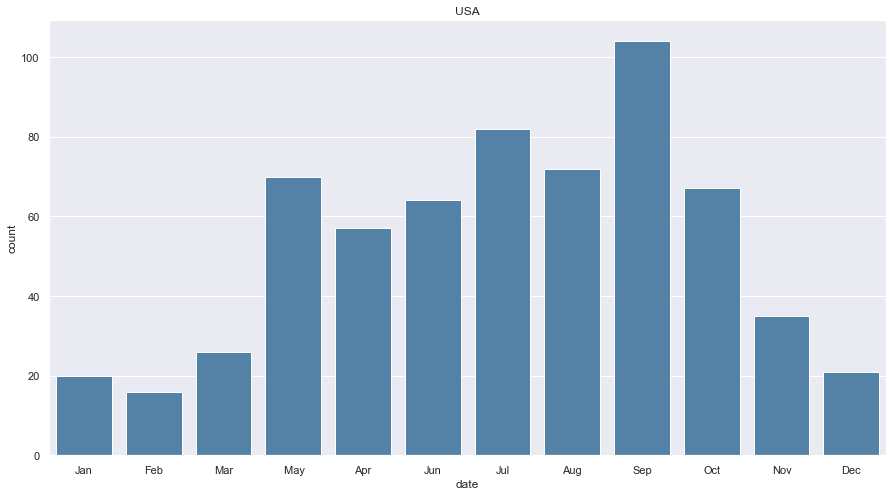

In [72]:
# SOLO USA
shark_attack_usa_month = shark_attack_top6_month[shark_attack_top6_month.country == 'usa']
graf = sns.countplot(x=shark_attack_usa_month.date, color= 'steelblue');
plt.title ('USA')
labels = ('Jan', 'Feb', 'Mar', ' May', 'Apr', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
graf.set_xticklabels(labels);

# Por edad 

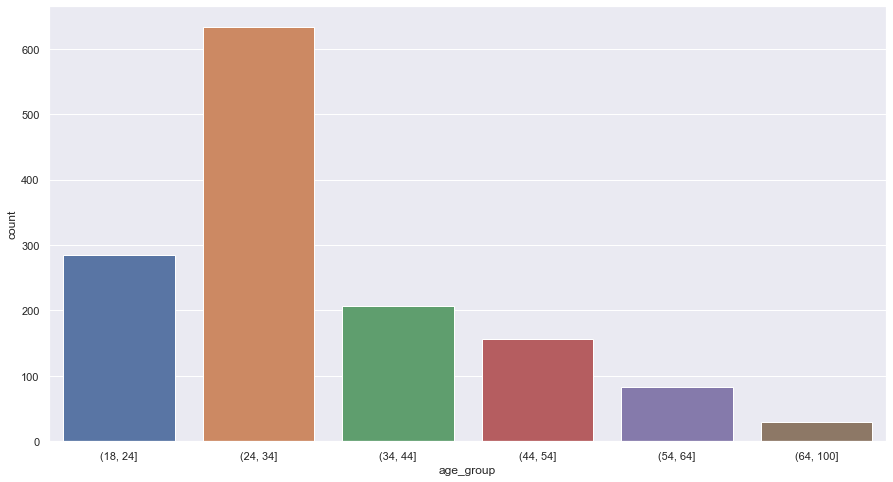

In [73]:
# Mostramos datos agrupados por edad
shark_attack_group_age = shark_attack.copy()
shark_attack_group_age['age_group'] = pd.cut(shark_attack_group_age.age, [18,24,34,44,54,64,100])
sns.countplot(x=shark_attack_group_age.age_group);

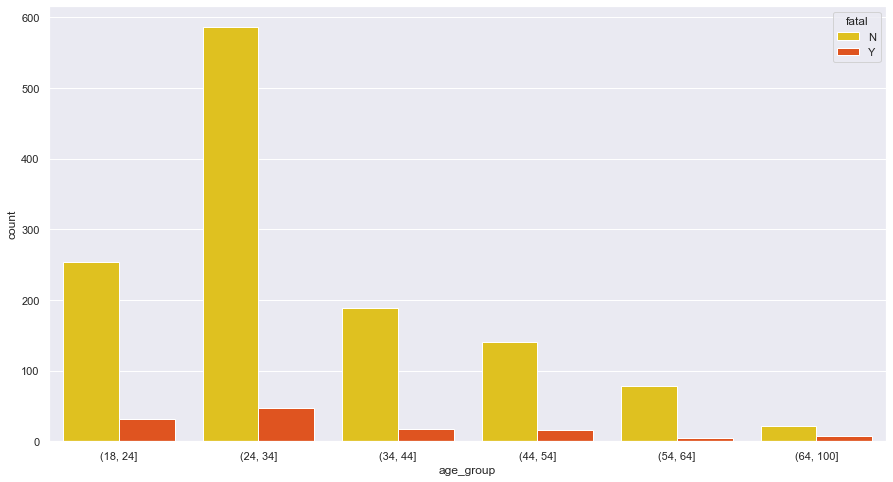

In [74]:
sns.countplot (x=shark_attack_group_age.age_group, hue=shark_attack_group_age.fatal, palette = ('gold', 'orangered'));


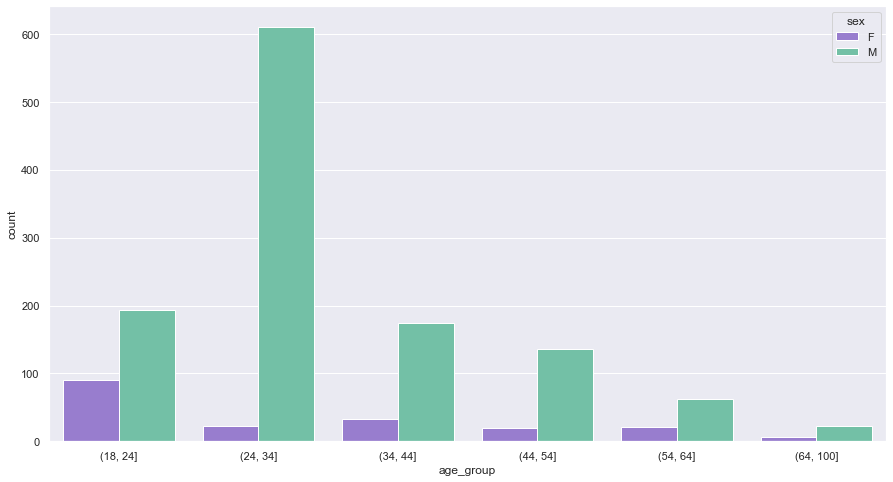

In [75]:
sns.countplot (x=shark_attack_group_age.age_group, hue=shark_attack_group_age.sex, palette=('mediumpurple','mediumaquamarine'));


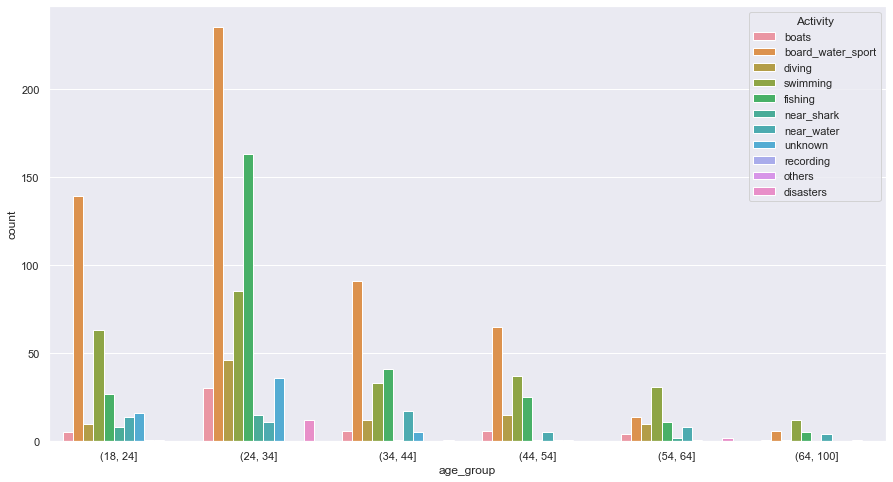

In [76]:
sns.countplot (x=shark_attack_group_age.age_group, hue=shark_attack_group_age.activity)
plt.legend(loc ='upper right', title = 'Activity');

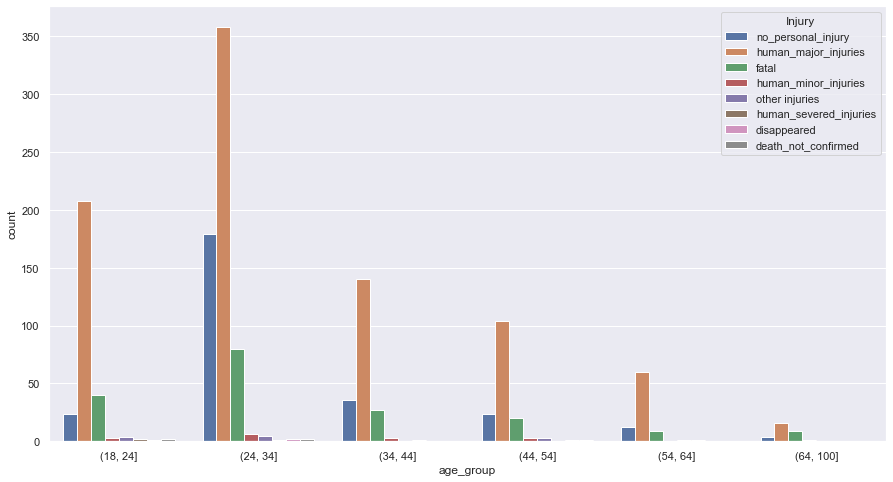

In [77]:
sns.countplot (x=shark_attack_group_age.age_group, hue=shark_attack_group_age.injury)
plt.legend(loc ='upper right', title = 'Injury');

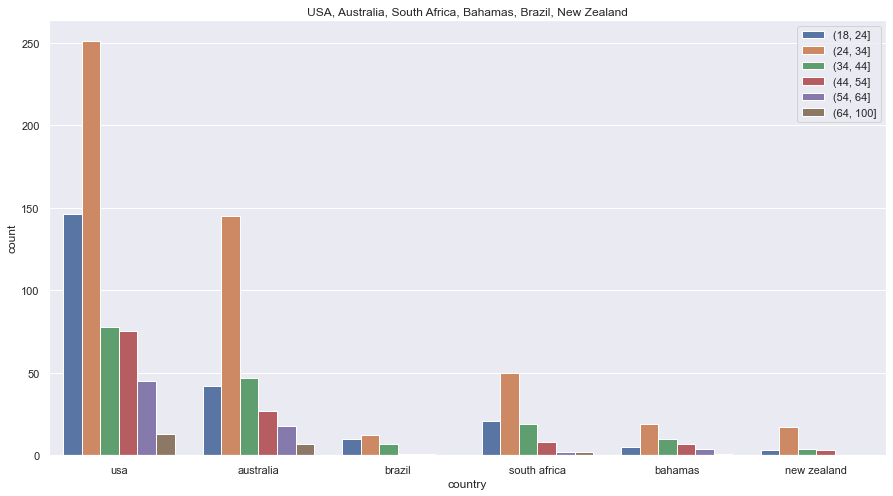

In [78]:
shark_attack_group_age_country_top6 = shark_attack_country_top6.copy()
shark_attack_group_age_country_top6['age_group'] = pd.cut(shark_attack_group_age_country_top6.age, [18,24,34,44,54,64,100])
sns.countplot(x=shark_attack_group_age_country_top6.country, hue=shark_attack_group_age_country_top6.age_group)
plt.title ('USA, Australia, South Africa, Bahamas, Brazil, New Zealand')
plt.legend(loc ='upper right');

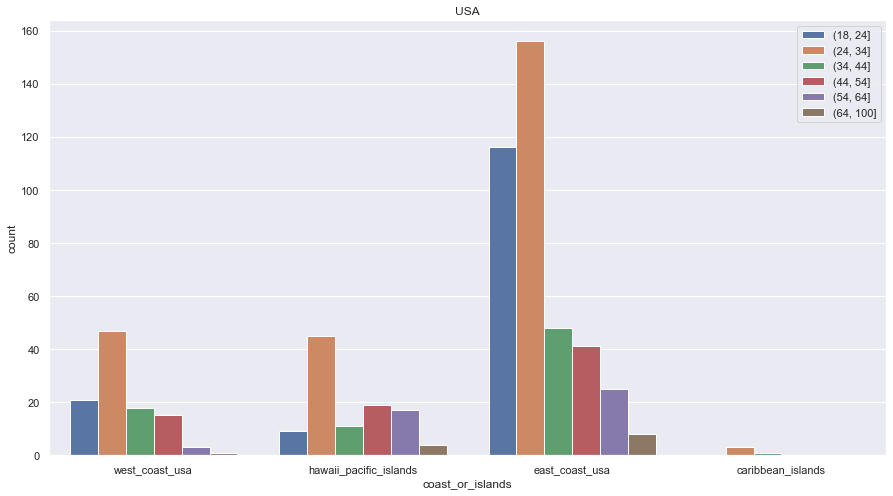

In [79]:
#USA
shark_attack_group_age_usa = shark_attack_usa.copy()
shark_attack_group_age_usa['age_group'] = pd.cut(shark_attack_group_age_usa.age, [18,24,34,44,54,64,100])
sns.countplot(x=shark_attack_usa.coast_or_islands, hue=shark_attack_group_age_usa.age_group)
plt.title ('USA')
plt.legend(loc = 'upper right');

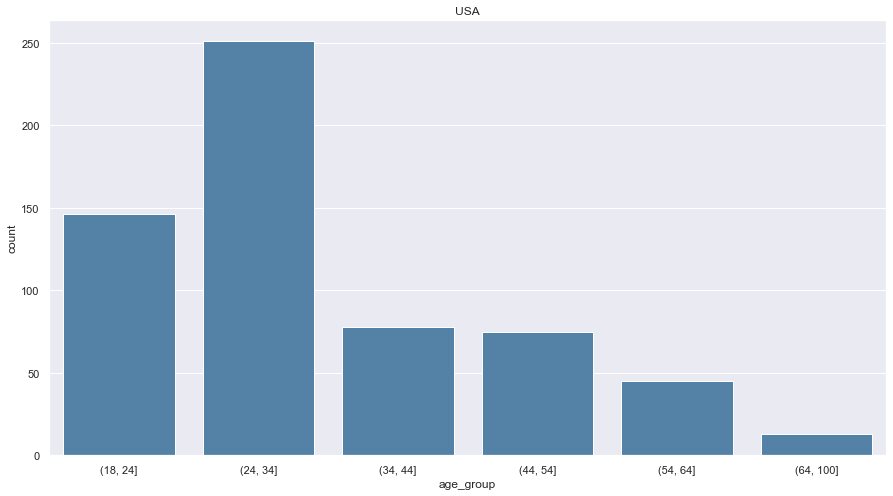

In [80]:
sns.countplot(x=shark_attack_group_age_usa.age_group, color = 'steelblue')
plt.title ('USA');